In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
df = pd.read_pickle('df_all_features.pkl')

In [3]:
df.columns

Index(['dtime', 'sales', 'price', 'sales_smpy', 'num_accounts', 'permit_total',
       'avg_dew_humidity_pct', 'avg_wind_speed_mph', 'temp_deviation',
       'HDD_CDD', 'personal_income', 'real_gdp', 'consumer_spending',
       'population', 'person_per_account', 'hum_wind', 'hum_temp',
       'wind_temp'],
      dtype='object')

In [4]:
df = df[['sales','sales_smpy', 'price', 'num_accounts',
       'avg_dew_humidity_pct', 'avg_wind_speed_mph', 'temp_deviation',
       'HDD_CDD']]

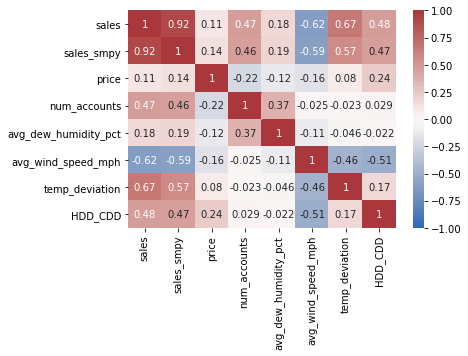

In [5]:
sns.heatmap(df.corr(), cmap='vlag', annot=True, vmin=-1, vmax=1);

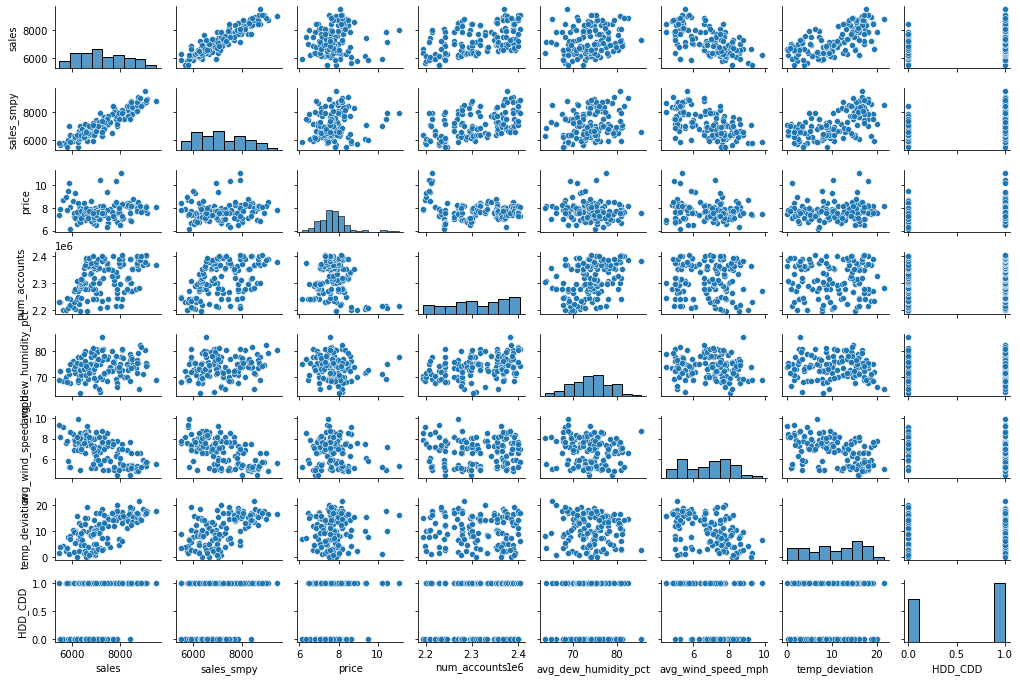

In [6]:
sns.pairplot(df, height=1.2, aspect=1.5);

In [7]:
selected_features = df[['price','sales_smpy', 'num_accounts',
       'avg_dew_humidity_pct', 'avg_wind_speed_mph', 'temp_deviation',
       'HDD_CDD',]]
selected_features

,price,sales_smpy,num_accounts,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD
0,7.86,6320,2195097,70.291034,7.846897,15.106897,0
1,7.88,6341,2195066,69.325352,8.550000,7.764789,0
2,8.66,5794,2197717,68.307285,9.088742,4.431126,0
3,8.94,5737,2200910,69.818667,7.596667,2.212667,1
4,9.35,6082,2201846,71.646667,7.518000,10.014667,1
...,...,...,...,...,...,...,...
128,7.62,8430,2400894,81.647143,5.265000,14.407857,1
129,7.33,7934,2404131,80.922297,6.945946,6.270946,1
130,7.55,7068,2401511,81.157447,7.121277,8.759574,0
131,7.57,7344,2400112,80.674468,7.639007,11.066667,0


In [8]:
X = selected_features

y = df["sales"]

In [9]:
#Split the data 80-20 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=15)

In [10]:
std = StandardScaler()
m = LassoCV(cv=5, max_iter = 1000000)
p = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = p.fit_transform(X_train)
X_train_poly_scaled = std.fit_transform(X_train_poly)
m.fit(X_train_poly_scaled,y_train)
m.score(X_train_poly_scaled,y_train)

0.9233371513448019

In [11]:
m.score(std.transform(p.transform(X_test)),y_test)

0.9000175522330479

In [12]:
list(zip(p.get_feature_names(selected_features.columns),m.coef_))

[('1', 0.0),
 ('price', -0.0),
 ('sales_smpy', 113.17608135932922),
 ('num_accounts', 162.62539991693615),
 ('avg_dew_humidity_pct', 0.0),
 ('avg_wind_speed_mph', -0.0),
 ('temp_deviation', 0.0),
 ('HDD_CDD', 0.0),
 ('price sales_smpy', 0.0),
 ('price num_accounts', -0.0),
 ('price avg_dew_humidity_pct', -42.93232613344224),
 ('price avg_wind_speed_mph', -3.573079638418528),
 ('price temp_deviation', 375.903488829093),
 ('price HDD_CDD', -0.0),
 ('sales_smpy num_accounts', 345.85970450803626),
 ('sales_smpy avg_dew_humidity_pct', 0.0),
 ('sales_smpy avg_wind_speed_mph', -14.673366606595538),
 ('sales_smpy temp_deviation', 0.0),
 ('sales_smpy HDD_CDD', 294.8827080674818),
 ('num_accounts avg_dew_humidity_pct', 16.731326256033253),
 ('num_accounts avg_wind_speed_mph', -0.0),
 ('num_accounts temp_deviation', -0.0),
 ('num_accounts HDD_CDD', 0.0),
 ('avg_dew_humidity_pct avg_wind_speed_mph', 0.0),
 ('avg_dew_humidity_pct temp_deviation', -0.0),
 ('avg_dew_humidity_pct HDD_CDD', -0.0),
 ('a

In [18]:
X_te_poly = p.transform(X_test)
X_te = std.transform(X_te_poly)
test_set_pred = m.predict(X_te)

In [19]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [20]:
mae(y_test, test_set_pred)

222.7978679048657